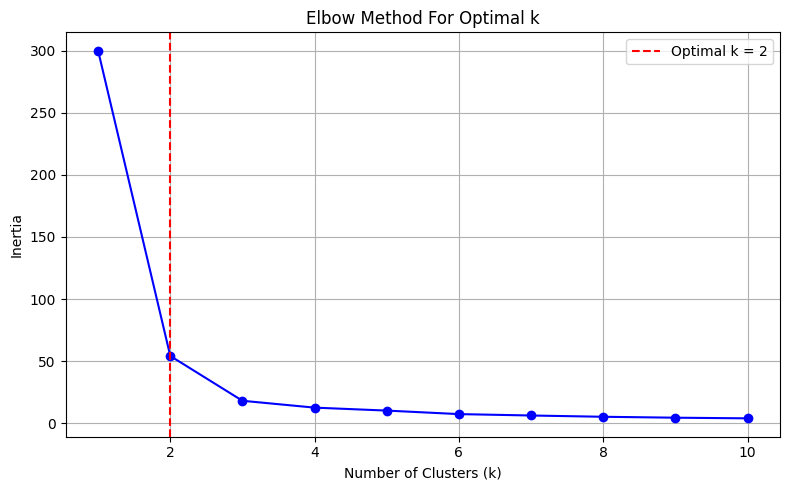

Optimal number of clusters (k): 2


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
df = pd.read_csv("iris (3).csv")  # Replace with your actual filename if needed

# Use only petal length and petal width
X = df[['petal_length', 'petal_width']]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find optimal K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Automatically determine the elbow point (optional)
diff = np.diff(inertia)
diff_r = np.diff(diff)
optimal_k = np.argwhere(diff_r > -0.1)[0][0] + 2  # add 2 due to second derivative shift

# Plot elbow graph with optimal K marked
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Output the optimal k
print(f"Optimal number of clusters (k): {optimal_k}")
